# Example 1: Finding maximum arrival rate for given system and performance requirements

Consider a data processing system with $N_C = 10$ Cloud servers. Mean data processing time $T_C = 100$ s. What is maximum arrival rate of data processing requests per hour $\lambda_{cr}$ if critical mean waiting time $W_{cr} = 300$ s? Estimate how the $\lambda_{cr}$ depends on the distribution of processing time, when: 

a) processing time is constant - standard deviation $std(T_C)=0$ s, 

b) standard deviation of processing time $std(T_C)=50$ s, 

c) processing time is exponentially distributed - standard deviation $std(T_C)=mean(T_C)=100$ s.

To solve this task the multi-server msqs model can be used from the core functions library.

Elapsed time is 0.026600 seconds
When mean(T_C) = 100.00 s, N_C = 10 :
 - lambda_cr = 288 req./h, if std(T_C) = 0 s
 - lambda_cr = 274 req./h, if std(T_C) = 50 s
 - lambda_cr = 240 req./h, if std(T_C) = 100 s


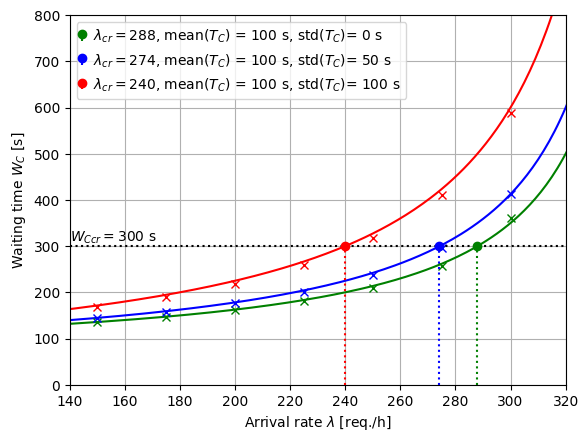

In [2]:
import matplotlib.pylab as plt

from qsystems import msqs
import pandas as pd 
import time

N_C = 10; T_C_s = 100; W_cr_s = 300
stdT_C_s = 50 # for MG1 system
# for MD1 system stdT_C = 0 (handled in auto by msqs)
# for MM1 system stdT_C = T_C (handled in auto by msqs)
timeStart = time.time()
lambda_C_list = range(0,350,1)
sysparam_mm1 = []; sysparam_md1 = []; sysparam_mg1 = []
for lambda_C in lambda_C_list:
    sysparam_md1.append(
    	msqs(ar=lambda_C,sn=N_C,s1=T_C_s/3600,qs="md1"))
    sysparam_mm1.append(
    	msqs(ar=lambda_C,sn=N_C,s1=T_C_s/3600,qs="mm1"))
    sysparam_mg1.append(
    	msqs(ar=lambda_C,sn=N_C,s1=T_C_s/3600,
    	vs=(stdT_C_s/3600)**2,qs="mg1"))

df_mm1 = pd.DataFrame(sysparam_mm1)
df_md1 = pd.DataFrame(sysparam_md1)
df_mg1 = pd.DataFrame(sysparam_mg1)

lambda_cr_md1=df_md1[df_md1['w']*3600<W_cr_s].tail(1)['ar']
lambda_cr_mg1=df_mg1[df_mg1['w']*3600<W_cr_s].tail(1)['ar']
lambda_cr_mm1=df_mm1[df_mm1['w']*3600<W_cr_s].tail(1)['ar']

print("Elapsed time is %f seconds"%(time.time()-timeStart))

print("When mean(T_C) = %.2f s, N_C = %d :"%(T_C_s,N_C))
print(" - lambda_cr = %d req./h, if std(T_C) = 0 s"%lambda_cr_md1)
print(" - lambda_cr = %d req./h, if std(T_C) = 50 s"%lambda_cr_mg1)
print(" - lambda_cr = %d req./h, if std(T_C) = 100 s"%lambda_cr_mm1)

# >>> When mean(T_C) = 100.00 s, N_C = 10 :
# >>>  - lambda_cr = 288 req./h, if std(T_C) = 0 s
# >>>  - lambda_cr = 274 req./h, if std(T_C) = 50 s
# >>>  - lambda_cr = 240 req./h, if std(T_C) = 100 s

# import data to compare with event-driven Matlab model results
df_matlab = pd.read_csv('event_driven_model_results_simtime1000h.csv')

plt.figure()

plt.plot(df_md1['ar'],df_md1['w']*3600,'g')
plt.plot(df_mg1['ar'],df_mg1['w']*3600,'b')
plt.plot(df_mm1['ar'],df_mm1['w']*3600,'r')
plt.plot(df_matlab['Lambda'],df_matlab['W_C_md1'],'gx')
plt.plot(df_matlab['Lambda'],df_matlab['W_C_mg1'],'bx')
plt.plot(df_matlab['Lambda'],df_matlab['W_C_mm1'],'rx')

plt.axhline(W_cr_s,color='black',linestyle=':')

plt.stem(lambda_cr_md1,W_cr_s,'g:',label="$\lambda_{cr}=%d$, mean($T_C$) = 100 s, std($T_C$)= 0 s"%lambda_cr_md1) 
plt.stem(lambda_cr_mg1,W_cr_s,'b:',label="$\lambda_{cr}=%d$, mean($T_C$) = 100 s, std($T_C$)= 50 s"%lambda_cr_mg1)
plt.stem([lambda_cr_mm1],[W_cr_s],'r:',label="$\lambda_{cr}=%d$, mean($T_C$) = 100 s, std($T_C$)= 100 s"%lambda_cr_mm1)
plt.text(140,W_cr_s+10,"$W_{Ccr} = %d$ s"%W_cr_s)

plt.xlim([140,320])
plt.ylim([0,800])
plt.grid()
plt.xlabel("Arrival rate $\lambda$ [req./h]")
plt.ylabel("Waiting time $W_C$ [s]")
plt.legend(handlelength=0)
#plt.savefig("Fig_Example1.pdf")
plt.show()